<a href="https://colab.research.google.com/github/Antech15/LAEP-Project/blob/main/testing/LAEP_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get access to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install scikeras

# Import libraries

In [3]:
import requests
import time
import zipfile
import io
import os
import gc
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pickle
import sklearn.ensemble as ek
from sklearn import tree, linear_model
from sklearn.feature_selection import SelectFromModel,f_classif,SelectKBest
import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,recall_score,precision_score,classification_report,ConfusionMatrixDisplay,balanced_accuracy_score,roc_curve,roc_auc_score,make_scorer
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LogisticRegression,LassoCV
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split,KFold, cross_val_score,GridSearchCV,RepeatedStratifiedKFold,RandomizedSearchCV,StratifiedKFold,cross_validate
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from prettytable import PrettyTable
from numpy import mean,std
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.neural_network import MLPClassifier
from scipy.stats import randint as sp_randint
from keras.models import Sequential
from keras import layers,Input, backend as K
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset
"CICIoT2023.zip" from https://www.unb.ca/cic/datasets/iotdataset-2023.html

In [4]:
# Directory containing unzipped CSV files
csv_directory = '/content/drive/MyDrive/CICIoT2023/unzipped/'

# List to accumulate DataFrames
all_dataframes = []

# List all CSV files in the directory
csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]

#How much CSVs to include
n = 46

# Read each CSV file and append to the list, limiting to the specified number
for csv_file in csv_files[:n]:
    file_path = os.path.join(csv_directory, csv_file)
    df = pd.read_csv(file_path)
    all_dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(all_dataframes, ignore_index=True)

The original dataset:

In [5]:
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.0,8.216014,8.216014,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.333093e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-PSHACK_Flood
1,0.000000,0.00,1.00,64.0,1.273160,1.273160,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.348239e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
2,0.197337,234065.00,17.00,64.0,2139.548403,2139.548403,0.0,0.0,0.0,0.0,...,0.000000,554.00,8.376294e+07,9.5,33.286634,0.000000,0.000000,0.00,141.55,Mirai-udpplain
3,0.107838,30854.50,17.00,64.0,11434.330849,11434.330849,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.310663e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
4,4.636251,108.00,6.00,64.0,0.431384,0.431384,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.298534e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-SYN_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10384857,0.000000,54.00,6.00,64.0,0.642241,0.642241,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.297355e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-SYN_Flood
10384858,0.078124,19409.93,16.78,64.0,3996.350453,3996.350453,0.0,0.0,0.0,0.0,...,11.410263,52.79,8.310230e+07,9.5,10.318792,16.158024,847.818724,0.23,141.55,DDoS-UDP_Flood
10384859,0.000000,54.00,6.00,64.0,1.001489,1.001489,0.0,1.0,0.0,1.0,...,0.000000,54.00,8.334518e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
10384860,0.000000,54.00,6.00,64.0,111.632284,111.632284,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.307225e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-TCP_Flood


# Get only Mirai and BenignTraffic


In [6]:
#Gets only rows that have the label 'BenignTraffic' or 'Mirai...'
mb = df.loc[ df['label'].str.startswith('Mirai') | (df['label'] == 'BenignTraffic')]

mb

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
2,0.197337,234065.00,17.00,64.00,2139.548403,2139.548403,0.0,0.0,0.0,0.0,...,0.000000,554.00,8.376294e+07,9.5,33.286634,0.000000,0.000000,0.00,141.55,Mirai-udpplain
8,59.943630,734901.00,9.30,185.10,29.281833,29.281833,0.0,0.0,0.0,0.0,...,821.535948,148.30,1.665179e+08,13.5,31.921579,1163.895622,681026.259706,1.00,244.60,BenignTraffic
14,0.000000,0.00,47.00,64.00,9.193116,9.193116,0.0,0.0,0.0,0.0,...,0.000000,578.00,8.366359e+07,9.5,34.000000,0.000000,0.000000,0.00,141.55,Mirai-greip_flood
30,2.993903,3160065.88,16.56,71.17,12319.048818,12319.048818,0.0,0.0,0.0,0.0,...,7.412056,534.95,8.376298e+07,9.5,33.224864,10.170784,881.275805,0.06,141.55,Mirai-udpplain
34,33.236488,1833198.60,7.10,183.90,61.203274,61.203274,0.0,0.0,0.0,0.0,...,947.269470,524.20,1.665261e+08,13.5,53.182192,1339.421266,903320.347126,1.00,244.60,BenignTraffic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10384800,66.590044,3989545.60,6.00,148.00,55.491134,55.491134,0.0,0.0,0.0,0.0,...,569.995169,646.30,4.876304e-03,5.5,33.625628,806.094898,405479.243964,0.90,38.50,BenignTraffic
10384804,1.061234,841797.46,16.67,63.36,1431.604774,1431.604774,0.0,0.0,0.0,0.0,...,35.960273,544.50,8.378897e+07,9.5,32.922630,50.927409,5036.991625,0.27,141.55,Mirai-udpplain
10384827,2.873124,4172683.68,16.83,63.36,2621.495247,2621.495247,0.0,0.0,0.0,0.0,...,13.757784,549.06,8.370719e+07,9.5,33.170210,19.493835,1744.216528,0.11,141.55,Mirai-udpplain
10384828,4.364584,261615.42,16.84,64.00,108.183864,108.183864,0.0,0.0,0.0,0.0,...,1.020571,554.27,8.376294e+07,9.5,33.295955,1.445349,7.620432,0.14,141.55,Mirai-udpplain


In [17]:
mb.shape

(830512, 47)

What are all the types of Mirai?

In [7]:
mb.label.unique()

array(['Mirai-udpplain', 'BenignTraffic', 'Mirai-greip_flood',
       'Mirai-greeth_flood'], dtype=object)

## Pie chart showing Benign vs all types of Mirai

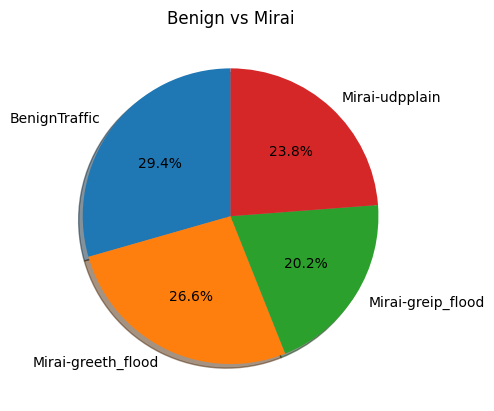

In [8]:
mb.groupby('label').size().plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90)
plt.xlabel('')
plt.title('Benign vs Mirai')
plt.show()

# First, split the data to 70/30

In [9]:
mb.shape
print("Total:\t",mb.shape)

Y = mb['label']
X = mb.drop(['label'], axis=1)

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
# define random_state to avoid a different random value, and subsequently avoid a different dataset split, each time we run the program

print("X train:",X_train.shape)
print("Y train:", y_train.shape)

print("X test:\t",X_test.shape)
print("Y test:\t", y_test.shape)

Total:	 (830512, 47)
X train: (581358, 46)
Y train: (581358,)
X test:	 (249154, 46)
Y test:	 (249154,)


# Trying Decision Tree without classifiers

In [10]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=10)

Train (fit) the model

In [11]:
# Record the start time
start_time = time.time()

#fit
rf_classifier.fit(X_train, y_train)

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Output the elapsed time in seconds
print(f"Time taken: {elapsed_time:.4f} seconds")

Time taken: 185.3828 seconds


In [12]:
rf_classifier.score(X_test, y_test)

0.9998434703035071

What are the important features?

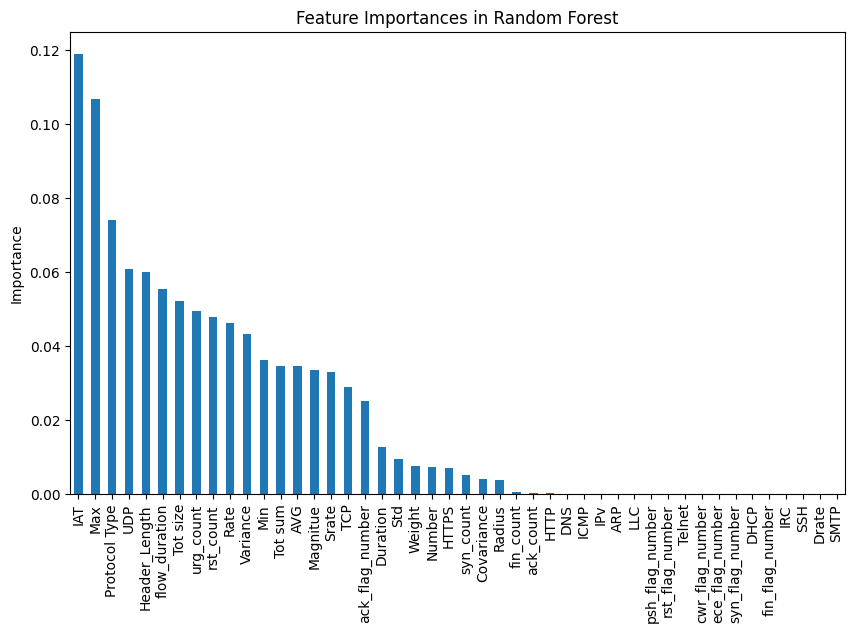

In [14]:
importance_rf = rf_classifier.feature_importances_
feature_importance_rf = pd.Series(importance_rf, index = X_test.columns)
plt.figure(figsize=(10, 6))
feature_importance_rf.sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest')
plt.show()

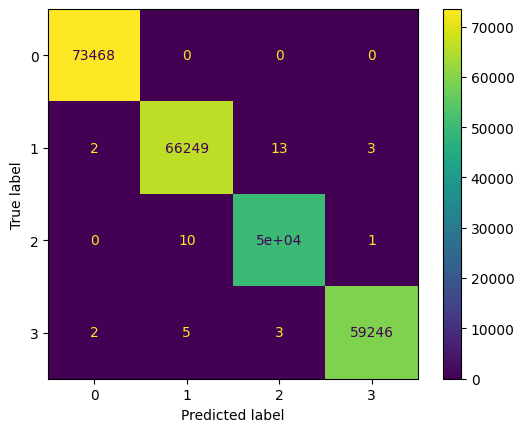


Accuracy: 0.999843

F1 score: [0.99997278 0.999751   0.99973089 0.99988186]
                    precision    recall  f1-score   support

     BenignTraffic       1.00      1.00      1.00     73472
Mirai-greeth_flood       1.00      1.00      1.00     66264
 Mirai-greip_flood       1.00      1.00      1.00     50168
    Mirai-udpplain       1.00      1.00      1.00     59250

          accuracy                           1.00    249154
         macro avg       1.00      1.00      1.00    249154
      weighted avg       1.00      1.00      1.00    249154



In [22]:
#Make predictions
y_pred = rf_classifier.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: %f" % acc)

f1 = f1_score(y_test, y_pred, average=None)
print("\nF1 score:", f1)

print(classification_report(y_pred,y_test))